In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y=df['DiabetesPedigreeFunction']
x=df[['Age']]
print(x)
print(y)

     Age
0     50
1     31
2     32
3     21
4     33
..   ...
763   63
764   27
765   30
766   47
767   23

[768 rows x 1 columns]
0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64


In [6]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.25,random_state=1)

In [7]:
model=LinearRegression()
model.fit(xtr,ytr)
ypre=model.predict(xte)

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f"MSE:  {mean_squared_error(yte,ypre)}")
print(f"MAE:  {mean_absolute_error(yte,ypre)}")
print(f"R-Sqaure :  {r2_score(yte,ypre)}")
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)
rss = ((ypre - yte) ** 2).sum()
print("Residual Sum of Squares (RSS):", rss)

MSE:  0.109989460859657
MAE:  0.2498021723582684
R-Sqaure :  -0.003006766909865899
Coefficients: [0.00114239]
Intercept: 0.4299774582776388
Residual Sum of Squares (RSS): 21.117976485054143


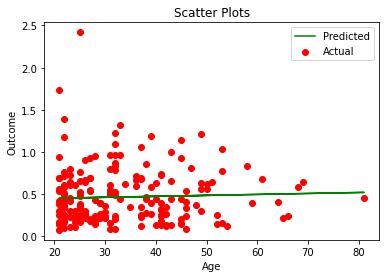

In [10]:
plt.scatter(xte,yte,color="red",label="Actual")
plt.plot(xte,ypre,color="green",label="Predicted")
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.title("Scatter Plots")
plt.legend()
plt.show()